<a href="https://colab.research.google.com/github/shikarRajcomar-Engineer/Ensemble/blob/master/Baseline_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd

path='/content/drive/My Drive/DR Dataset/'    
Results=pd.DataFrame([])
Results1=pd.DataFrame([])
Results2=pd.DataFrame([])
Results3=pd.DataFrame([])
Results4=pd.DataFrame([])
Results5=pd.DataFrame([])
Results6=pd.DataFrame([])


Dataset=['ComplianceBARROWSV2224']

Total number of outputs :  2
Output classes :  [3 4]


<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

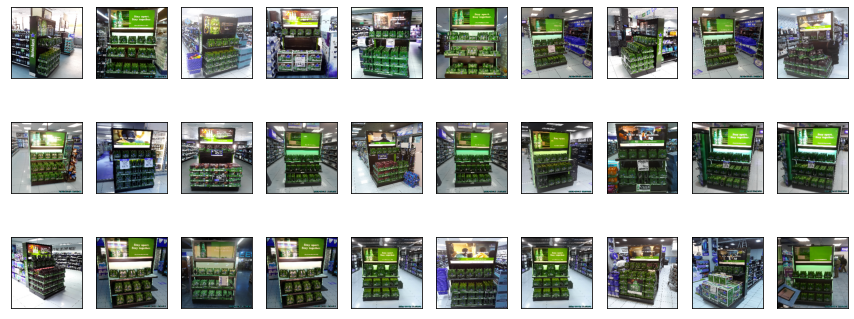

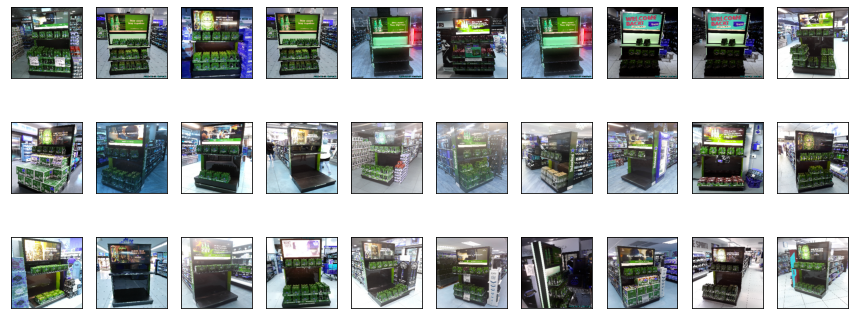

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 8.3883 - accuracy: 0.0000e+00 - val_loss: 0.8667 - val_accuracy: 0.5128
Epoch 2/30
1/1 [==============================] - 1s 765ms/step - loss: 0.8712 - accuracy: 0.4615 - val_loss: 1.0413 - val_accuracy: 0.6154
Epoch 3/30
1/1 [==============================] - 1s 765ms/step - loss: 1.0319 - accuracy: 0.6154 - val_loss: 0.7490 - val_accuracy: 0.3846
Epoch 4/30
1/1 [==============================] - 1s 772ms/step - loss: 0.7538 - accuracy: 0.3846 - val_loss: 0.6881 - val_accuracy: 0.5128
Epoch 5/30
1/1 [==============================] - 1s 764ms/step - loss: 0.6847 - accuracy: 0.6703 - val_loss: 0.6992 - val_accuracy: 0.6154
Epoch 6/30
1/1 [==============================] - 1s 768ms/step - loss: 0.6971 - accuracy: 0.6154 - val_loss: 0.6938 - val_accuracy: 0.6154
Epoch 7/30
1/1 [==============================] - 1s 763ms/step - loss: 0.6909 - accuracy: 0.6154 - val_loss: 0.6659 - val_accuracy: 0.6154
Epoch 8/30
1/1 [===

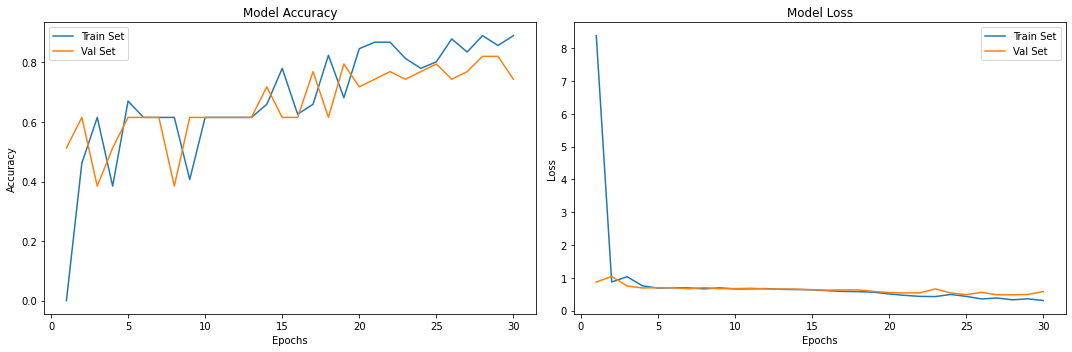

Train: 0.879, Test: 0.744


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.718750,0.857143,0.74359,0.787946,0.771978,No Aug,the_wave224,74.358976,89.01099
recall,0.958333,0.400000,0.74359,0.679167,0.743590,No Aug,the_wave224,74.358976,89.01099
f1-score,0.821429,0.545455,0.74359,0.683442,0.715285,No Aug,the_wave224,74.358976,89.01099
support,24.000000,15.000000,0.74359,39.000000,39.000000,No Aug,the_wave224,74.358976,89.01099


In [5]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight

 



batch_size=192
steps=100




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])

y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]
input_shape=(img_rows,img_cols,1)


y = dict()
y[0] = []
y[1] = []
y[2] = []
y[3] = []
y[4] = []


for set_name in (y_train, y_testing):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))
    y[2].append(np.sum(set_name == 2))
    y[3].append(np.sum(set_name == 3))
    y[4].append(np.sum(set_name == 4))
trace0 = go.Bar(
    x=['Train Set','Test Set'],
    y=y[0],
    name='1',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)

trace2 = go.Bar(
    x=['Train Set', 'Test Set'],
    y=y[2],
    name='2',
    marker=dict(color='#ff3300'),
    opacity=0.7
)


trace3 = go.Bar(
    x=['Train Set', 'Test Set'],
    y=y[3],
    name='3',
    marker=dict(color='#ff3300'),
    opacity=0.7
)

trace4 = go.Bar(
    x=['Train Set', 'Test Set'],
    y=y[4],
    name='4',
    marker=dict(color='#ff3300'),
    opacity=0.7
)

data = [trace0, trace1,trace2,trace3,trace4]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

def plot_samples(X, y, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(10):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)
        c=1
        plt.figure(figsize=(15,6))
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1

        plt.show()

plot_samples(x_train, y_train, 30)



from keras.applications.vgg16 import VGG16
model = VGG16()



# model = keras.models.Sequential()
# model.add(Conv2D(96, (3, 3), input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(Dropout(0.1))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(Dropout(0.3))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(Dropout(0.1))


# model.add(Flatten())  
# model.add(Dense(5))
# model.add(Activation("softmax"))
# model.add(Dropout(0.1))



# optimizer = keras.optimizers.Adam(lr=0.01)
# model.compile(optimizer=optimizer,
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen = ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=1
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=30

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=1,
      shuffle=True
     )
     
from keras.models import load_model     
model.save('Barrowsmodel.h5')
del model

model=load_model('Barrowsmodel.h5')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))




his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['the_wave224','the_wave224','the_wave224','the_wave224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results=Results.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results)
keras.backend.clear_session()


In [10]:
from keras.models import load_model
import cv2
import numpy as np
from keras.preprocessing import image

path='/content/drive/My Drive/B1-Msc experiment/'    

class_labels=['',"","",'Stocked Correctly','Stocked incorrectly']

# model = load_model('model.h5')

img=image.load_img('/content/drive/My Drive/B1-Msc experiment/Good.png',target_size=(224,224))

img_test=np.array(img)/255
img=img_test.astype('float32')
listimg=np.expand_dims(img_test, axis=0)
results=model.predict(listimg)
single_results=results[0]

mostlikely_class=int(np.argmax(single_results))
classlikelyhood=single_results[mostlikely_class]


class_labels=class_labels[mostlikely_class]

print(mostlikely_class)
print("This Shelf is {}-likelihood:{:2f}".format(class_labels,classlikelyhood))


3
this image is a good-likelihood:0.937935


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



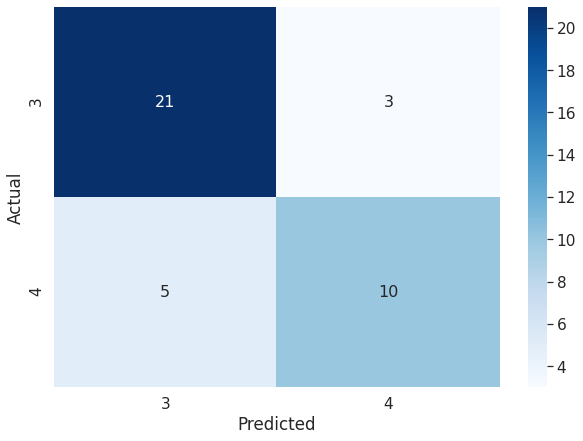

In [4]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_true =y_testing
y_pred = predicted_classes
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

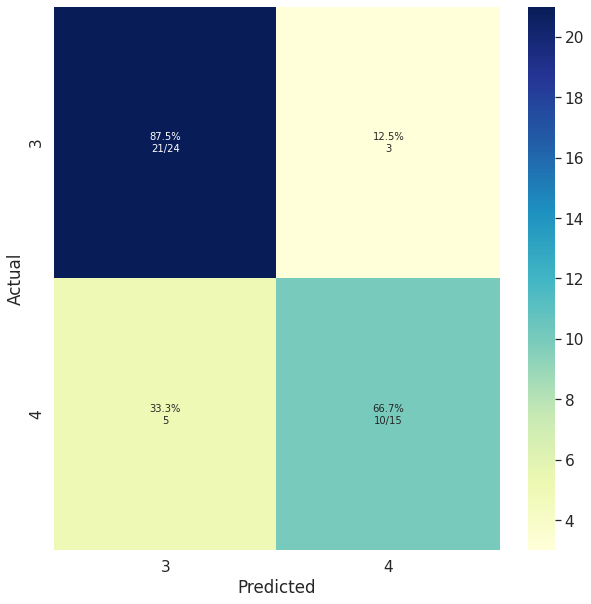

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(y_true, y_pred)